# `matplotlib`

မင်္ဂလာပါ၊ **Data Science Using Python -- *Week 15 Day 1*** မှ ကြိုဆိုပါတယ်။

ဒီနေ့ `matplotlib` library အကြောင်းကို ဆက်ပြီး လေ့လာကြမယ်။

![](https://i.ibb.co/Mfm14sZ/python-sci-com-landscape-drawio.png)

အပေါ်က ပုံမှာ ပြထားသလိုပဲ `numpy`, `scipy` နဲ့ `pandas` တို့လိုပဲ `matplotlib` ဟာ python data stack မှာ အရေးပါတဲ့ member တခုဖြစ်ပါတယ်။

In [ ]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
# interactive ON ထားရင် plt.show() ကို ခေါ်စရာ မလိုဘူး။
# ဒါပေမဲ့ good practice က interactive OFF ထားတာ ပိုကောင်းတယ်။
matplotlib.interactive(False) 

x, y coordinate system မှာ point တွေ ပြန့်ကျဲပြီး ပြတဲ့ scatter plot ကို `matplotlib` သုံးပြီး ဆွဲနိုင်တယ်။ 

In [ ]:
import numpy as np
np.random.seed(42)
x = np.random.normal(loc=5.0, scale=5.0, size=100)
y = np.random.binomial(10, 0.5, size=100).astype(np.float16)

In [ ]:
plt.scatter(x, y)
plt.show()

`scatter` ကိုလဲ `plot` လိုပဲ setting ပြောင်းနိုင်တယ်။

In [ ]:
plt.scatter(x, y, marker=".")
plt.show()

In [ ]:
plt.scatter(x, y, marker="d", s=10)
plt.show()

In [ ]:
# Try to change the marker type to "o" and size 20

size `s` ကို အသေမပေးပဲ array ပုံစံမျိုးနဲ့လဲ ပေးလို့ရတယ်။

In [ ]:
def x_plus_y(x, y):
    return np.absolute(x) + np.absolute(y)

s = x_plus_y(x, y)
print (type(s))
print (s.shape)
plt.scatter(x, y, s=s)
plt.show()

In [ ]:
from sklearn import datasets, model_selection as ms, linear_model as lm, cluster

In [ ]:
df_X, ds_y = datasets.fetch_california_housing(as_frame=True, return_X_y=True)
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(df_X, ds_y, test_size=0.3, random_state=42, shuffle=True)
tr_X.head()

In [ ]:
lat_to_plot = tr_X["Latitude"][::50]
lon_to_plot = tr_X["Longitude"][::50]
plt.scatter(lon_to_plot, lat_to_plot, marker=".")
plt.show()

scatter `plt` တခုမှာ color ကို customize လုပ်ချင်ရင် `c` ဆိုတဲ့ parameter ကို ပေးရတယ်။

In [ ]:
c = np.random.randint(0, 8, size=len(lat_to_plot))
plt.scatter(lon_to_plot, lat_to_plot, c=c)
plt.show()

ဒါကြောင့် clustering algorithm က ထွက်လာတဲ့ cluster id တွေကို `c` ထဲ ထည့်လိုက်ရင် cluster တခုစီ ထွက်လာတယ်။ 

In [ ]:
kmean = cluster.KMeans()
kmean.fit(tr_X[["Longitude", "Latitude"]])
c = kmean.predict(tr_X[["Longitude", "Latitude"]][::50])
plt.scatter(lon_to_plot, lat_to_plot, c=c)
plt.show()

**Assignment**

1. Try to plot a scatter plot with `HouseAge` divided by 10 and `AveRooms` features.

2. Put these features into `KMeans` and color your plot.

plot တခုတည်းမှာ plot နဲ့ scatter နဲ့လဲ တွဲဆွဲလို့ရတယ်။

In [ ]:
model = lm.LinearRegression()
model.fit(tr_X[["MedInc"]], tr_y)

x_to_plot = tr_X["MedInc"][::100]
y_act_to_plot = tr_y[::100]
# solve the error caused by the following line
y_pred_to_plot = model.predict(x_to_plot)

plt.scatter(x_to_plot, y_act_to_plot, marker=".")
plt.plot(x_to_plot, y_pred_to_plot, color="orange")
plt.show()

အခု ... အပေါ်ကလိုမျိုး ကော်လံအားလုံး (Lat/Lon မပါ) နဲ့ ဆွဲကြည့်ရအောင်။

In [ ]:
def get_things_to_plot(tr_X, tr_y, c):
    model = lm.LinearRegression()
    model.fit(tr_X[[c]], tr_y)

    x_to_plot = tr_X[c][::100]
    y_act_to_plot = tr_y[::100]
    # solve the error caused by the following line
    y_pred_to_plot = model.predict(x_to_plot)
    return x_to_plot, y_act_to_plot, y_pred_to_plot

In [ ]:
for c in tr_X.columns[:-2]:
    x_to_plot, y_act_to_plot, y_pred_to_plot = get_things_to_plot(tr_X, tr_y, c)

    plt.scatter(x_to_plot, y_act_to_plot, marker=".")
    plt.plot(x_to_plot, y_pred_to_plot, color="orange")
    plt.title("Linear Regression against {}".format(c))
    plt.show()

## Subplots

ပုံတွေအများကြီးကို အတူတူတွဲပြီး ပြဖို့အတွက် subplot ကို သုံးတယ်။ subplot ဆွဲနည်း ၃ မျိုးရှိတယ်။ 

In [ ]:
# အလွယ်ဆုံးနဲ့ အရှင်းဆုံးနည်းလမ်းကတော့ plt.subplots ပါပဲ။
fig, axs = plt.subplots(2, 3, figsize=(10, 10)) # axs will contain 2 rows 3 columns
for c, ax in zip (tr_X.columns[:-2], axs.reshape((6))):
    x, ya, yp = get_things_to_plot(tr_X, tr_y, c)
    ax.scatter(x_to_plot, y_act_to_plot, marker=".")
    ax.plot(x_to_plot, y_pred_to_plot, color="orange")
    ax.title.set_text(c)
plt.show()
# fix why all subplots are the same.

In [ ]:
# ဒုတိယနည်းကတော့ plt.subplot or fig.add_supplot ပါ။
_ = plt.figure(figsize=(10, 10))
for idx, c in enumerate(tr_X.columns[:-2]):
    x, ya, yp = get_things_to_plot(tr_X, tr_y, c)
    ax = plt.subplot(2, 3, idx + 1) # 2 row, 3 column, give me idx-th subplot
    # သတိထားဖို့က သူ့ index က 1 ကနေ စတယ်။
    ax.scatter(x, ya, marker=".")
    ax.plot(x, yp, color="orange")
    ax.title.set_text(c)
plt.show()

In [ ]:
# ဒုတိယနည်း မူကွဲ
fig = plt.figure(figsize=(10, 10))
for idx, c in enumerate(tr_X.columns[:-2]):
    x, ya, yp = get_things_to_plot(tr_X, tr_y, c)
    ax = fig.add_subplot(2, 3, idx + 1) # 2 row, 3 column, give me idx-th subplot
    # သတိထားဖို့က သူ့ index က 1 ကနေ စတယ်။
    ax.scatter(x, ya, marker=".")
    ax.plot(x, yp, color="orange")
    ax.title.set_text(c)
plt.show()

In [ ]:
# နောက်ဆုံးနည်းကတော့ subplot2grid ပါ

_ = plt.figure(figsize=(10, 10))
for row in range(0, 2):
    for col in range(0, 3):
        col_idx = row * 3 + col
        print ("col_idx is : {}".format(col_idx))
        c = tr_X.columns[col_idx]
        print ("column is : {}".format(c))

        x, ya, yp = get_things_to_plot(tr_X, tr_y, c)
        ax = plt.subplot2grid((2, 3), (row, col)) # 2 row, 3 column, give me subplot at (row, col)
        
        ax.scatter(x, ya, marker=".")
        ax.plot(x, yp, color="orange")
        ax.title.set_text(c)
plt.show()

အဲဒီ နည်း ၃ နည်းထဲမှာ သုံးလို့ အလွယ်ဆုံးက ပထမဆုံး `subplots` ဖြစ်ပြီး versatile အဖြစ်ဆုံးက `subplot2grid` ဖြစ်တယ်။ 

ဘယ်လို versatile ဖြစ်သလဲဆိုတာကို အောက်မှာ ကြည့်ရအောင်။

In [ ]:
x = np.linspace(0, 10, num=1000)
sin_x = np.sin(x)
cos_x = np.cos(x)
exp_x = np.exp(x)
log_x = np.log(x)

In [ ]:

_ = plt.figure(figsize=(10, 10))

ax_sin = plt.subplot2grid((2, 3), (0, 0))
ax_sin.plot(x, sin_x)

ax_cos = plt.subplot2grid((2, 3), (0, 1))
ax_cos.plot(x, cos_x)

ax_exp = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
ax_exp.plot(x, exp_x)

ax_log = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax_log.plot(x, log_x)

plt.show()

`figsize` ကို ပြင်ချင်ရင် `plt.figure` or `plt.subplots` မှာ `figsize` ဆိုပြီး `(width, size)` tuple အဖြစ် ပေးလိုက်လို့ရတယ်။ unit က inch ဖြစ်တယ်။

`axes` ရဲ့ aspect ratio ကို ပြင်ချင်ရင် `set_aspect` function ကို သုံးရတယ်။ 

`axes` ကို `plt` ကနေ `gca` function သုံးပြီး ယူလို့ရတယ်။

grid တွေ ပေါ်စေချင်ရင် `plt.grid` or `axes.grid` function နဲ့ ဖော်နိုင်တယ်။

In [ ]:
plt.grid(True)
ax = plt.gca()
ax.set_aspect(1)
plt.plot(x, sin_x)
plt.show()

`set_aspect` မှာ "auto", "equal" or numeric value ပေးနိုင်တယ်။ numeric value က height/width ဖြစ်တယ်။ ဒါကြောင့် 16:9 aspect ratio ကို လိုချင်ရင် 9/16 လို့ ပေးရမယ်။

### More Subplot Customisation

subplot ဆိုတာ axes object တွေပဲ ဖြစ်တယ်။ စောစောက ပြောခဲ့တဲ့ subplot တွေအကုန်လုံးက figure အောက်ထဲမှာ axes တွေ အနေနဲ့ သွားထည့်တာ ဖြစ်တယ်။ 

figure အောက်ထဲကို custom axes တွေလဲ ထည့်လို့ရတယ်။

In [ ]:
fig = plt.figure(figsize=(10, 10))

# now we will draw exponential function in the big axes starting from (0, 0) and of size (1, 1)
ax_exp = fig.add_axes([0, 0, 1, 1])
ax_exp.plot(x, exp_x)

# then, we will add another axes starting from (0.05, 0.5) and of size (0.4, 0.4) to plot sin wave
ax_sin = fig.add_axes([0.05, 0.5, 0.4, 0.4])
ax_sin.plot(x, sin_x)

plt.show()

sub plot တွေမှာ title တပ်ချင်ရင် plt မှာ title တပ်နည်းနဲ့ တပ်မရဘူး။ အပေါ်က ပုံမှာ "Sine Wave" နဲ့ "Exponential Curve" လို့ စာထိုးကြည့်ပါ။

In [ ]:
# try to put titles to the sub plots there

## Putting Texts

Axes နဲ့ Fugure တွေမှာ `text` function ကို သုံးပြီး စာထည့်လို့ရတယ်။ 

In [ ]:
fig = plt.gcf() # or just use plt.figure() as usual
fig.text(0.3, 0.3, s="figure text", color="black", alpha=0.3)

ax = plt.gca()
ax.set_xlim(5, 10)
ax.text(6, 1, s="Exponential Curve", fontsize=12, color="red", ha="center", va="center", alpha=1.0)
plt.plot(x, exp_x)
plt.show()

Possible values for `ha` are:

* "left"
* "right"
* "center" etc. 

Possible values for `va` are:

* "top"
* "bottom"
* "center"

**သတိထားဖို့က `fig` ရဲ့ coordinate ဟာ 0 နဲ့ 1 ကြားဖြစ်ပြီး `axes` ရဲ့ coordinate ဟာ `xlim` နဲ့ `ylim` ပေးသလောက်ဖြစ်တယ်။

In [ ]:
from scipy import stats
mu = np.mean(tr_X["MedInc"])
sigma = np.std(tr_X["MedInc"])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.annotate("mean", xy=(mu, 0.0), arrowprops={"color":"green"})
plt.annotate("standard deviation", xy=(sigma, 0.10), xytext=(mu, 0.10), ha="left", arrowprops={"color": "green"})
plt.show()

In [ ]:
c = tr_X["MedInc"].apply(lambda x : "green" if x > mu else "red")
x_to_plot, y_to_plot, c_to_plot = tr_X["Longitude"][::50], tr_X["Latitude"][::50], c[::50]
# solve the error occured below
plt.scatter(x_to_plot[c_to_plot == "green"], y_to_plot[c_to_plot == "green"], label="high income", marker=".", c=c)
plt.scatter(x_to_plot[c_to_plot == "red"], y_to_plot[c_to_plot == "red"], label="low income", marker=".", c=c)
plt.legend()

plt.text(-123, 40, "Northern California", ha="center", bbox={"alpha": 0.2, "color": "gray"})
plt.text(-116, 34, "Southern California", ha="right", bbox={"alpha": 0.2, "color": "gray"})

plt.show()

### Using twin Ys

`twinx` (not to be confused by its name) means TWIN aXes. Use this to create a parallel y axis. 

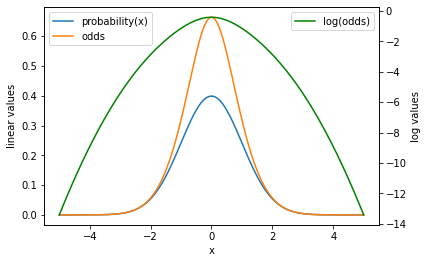

In [108]:
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("linear values")

x = np.linspace(-5, 5, num=1000)
prob = stats.norm.pdf(x)
ax.plot(x, prob, label="probability(x)")
odds = prob/(1 - prob)
ax.plot(x, odds, label="odds")

ax_log = ax.twinx()
ax_log.set_ylabel("log values")

log_odds = np.log(odds)
ax_log.plot(x, log_odds, label="log(odds)", color="green")

ax.legend(loc=2)
ax_log.legend()

plt.show()